## NESARC Data Analysis

NESARC (U.S. National Epidemiological Survey on Alcohol and Related Conditions) is a survey designed to determine the magnitude of alcohol use and psychiatric disorders in the U.S. population.

In [1]:
#Importing necessary libraries

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import numpy as np
import scipy.stats
import statsmodels.formula.api as smf

In [3]:
#Reading data

data = pd.read_csv("C:/Users/Mounika/Documents/monica work/DS_Projects/Coursera/nesarc_pds.csv")
data.shape

C:\Users\Mounika\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(43093, 3010)

###### Research Question 1:

Does high alcohol consumption frequency lead to more fights with family, friends or people at work?

In [4]:
#S2AQ8A HOW OFTEN DRANK ANY ALCOHOL IN LAST 12 MONTHS

pd.unique(data['S2AQ8A'])

array([' ', '10', '6', '8', '5', '3', '7', '4', '2', '9', '1', '99'], dtype=object)

In [5]:
#Checking for missing values

pd.isna(data.S2AQ8A).sum() 

0

In [6]:
#Recoding the levels to make them more readabale and meaningful

dict = {' ':'Non Drinker','1':'Every day','2':'Nearly every day','3':'3-4 times a week','4':'2 times a week','5':'Once a week','6':'2-3 times a week','7':'Once a month','8':'7-11 times in the last year','9':'3-6 times in the last year','10':'1 or 2 times in the last year','99':'Unkwown'}
data['ALCFREQ'] = data.S2AQ8A.map(dict)

#Converting to category type

data['ALCFREQ'] = data['ALCFREQ'].astype('category')

In [7]:
#Frequency distribution of the variable that describes how often an individual drank any alcohol in last 12 months

c1 = data['ALCFREQ'].value_counts()
print (c1)


Non Drinker                      16147
1 or 2 times in the last year     3637
2-3 times a week                  3557
Once a week                       3261
3-6 times in the last year        3210
2 times a week                    2914
Once a month                      2663
3-4 times a week                  2619
Every day                         1865
7-11 times in the last year       1805
Nearly every day                  1210
Unkwown                            205
Name: ALCFREQ, dtype: int64


C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


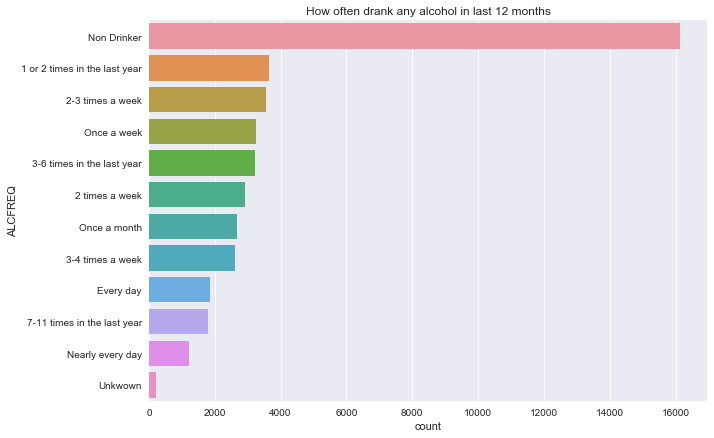

In [8]:
#Visual representation of the frequency distribution


plt.figure(figsize=(10,7))
plt.title("How often drank any alcohol in last 12 months")

sns.countplot(y="ALCFREQ", data=data,order=data['ALCFREQ'].value_counts().index)


We observe from the above frequency table and count plot that there are more non drinkers and people who consume alcohol every day or nearly every day are comparatively very less. But let us try to analyse if these individuals are more likely to indulge in fights or not. It is also important to note what type of alcohols are they frequently consuming because not all drinks have the same amount of alcohol content and thus the same effects.

In [9]:
#S2AQ23 MAIN TYPE OF ALCOHOL CONSUMED DURING PERIOD OF HEAVIEST DRINKING

pd.unique(data.S2AQ23)

array([' ', '2', '4', '1', '3', '9'], dtype=object)

In [10]:
pd.isna(data.S2AQ23).sum()

0

In [11]:
#Recoding levels

dict1 = {' ':'Non Drinker','1':'Coolers','2':'Beer','3':'Wine','4':'Liquor','9':'Unknown'}
data.S2AQ23 = data.S2AQ23.map(dict1)

#Converting to category type
data['S2AQ23'] = data['S2AQ23'].astype('category')

In [12]:
#Frequency table describing the counts for each type of alcohol

c2 = data['S2AQ23'].value_counts(normalize=True)
print (c2)


Beer           0.286613
Unknown        0.249344
Non Drinker    0.191818
Liquor         0.144989
Wine           0.085420
Coolers        0.041817
Name: S2AQ23, dtype: float64


C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


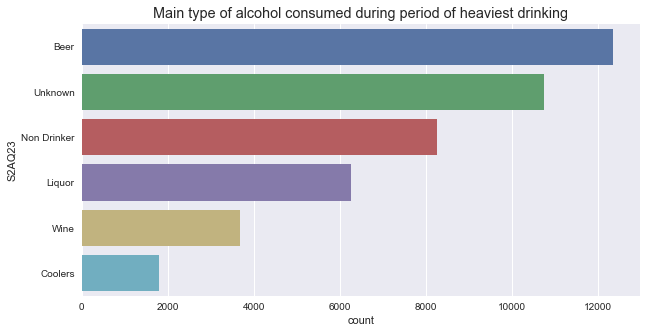

In [13]:
#Countplot displaying the counts for each type of variable

plt.figure(figsize=(10,5))
params = {'axes.titlesize':'x-large'}
pylab.rcParams.update(params)

plt.title("Main type of alcohol consumed during period of heaviest drinking")

sns.countplot(y="S2AQ23", data=data,order=data['S2AQ23'].value_counts(normalize=True).index)


It is evident that beer is most often consumed by individuals (28% ) during their period of heaviest drinking and coolers are consumed least.

Let's calculate the amount of alcohol intake by calculating the sum of ECF values of all the drinks consumed in last 12 months

COOLECF : Ethanol content by volume of cooler brand usually consumed in last 12 months

BEERECF : Ethanol content by volume of beer brand usually consumed in last 12 months

WINEECF : Ethanol content by volume of wine brand usually consumed in last 12 months

LIQRECF : Ethanol content by volume of liquor brand usually consumed in last 12 months

In [14]:
data['COOLECF'] = data['COOLECF'].convert_objects(convert_numeric=True)
data['BEERECF'] = data['BEERECF'].convert_objects(convert_numeric=True)
data['WINEECF'] = data['WINEECF'].convert_objects(convert_numeric=True)
data['LIQRECF'] = data['LIQRECF'].convert_objects(convert_numeric=True)

C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel 

In [15]:
#Creating a new column alc_by_vol which is the sum of the content of ethanol by vol of all drinks 

col_list = ['COOLECF','BEERECF','WINEECF','LIQRECF']
data['alc_by_vol'] = data[col_list].sum(axis=1)

In [16]:
data['alc_by_vol'].describe()

count    43093.000000
mean         0.191508
std          0.229858
min          0.000000
25%          0.000000
50%          0.050000
75%          0.442000
max          1.149000
Name: alc_by_vol, dtype: float64

In [17]:
data['abv1'] = data[data['alc_by_vol']>0.0]['alc_by_vol']

In [18]:
data['Ethanol_Content_By_Volume']=pd.cut(data.abv1, 3, labels=["ABV:0-0.403","ABV:0.404-0.775","ABV:0.781-1.149"])

In [19]:
#Set PANDAS to show all columns in DataFrame
pd.set_option('display.max_columns', None)

In [20]:
pd.crosstab(data['Ethanol_Content_By_Volume'],data['alc_by_vol'])

alc_by_vol,0.0,0.032,0.035,0.036000000000000004,0.038,0.039,0.040999999999999995,0.042,0.043,0.044000000000000004,0.045,0.046,0.047,0.048,0.049,0.05,0.051,0.052000000000000005,0.053,0.054000000000000006,0.055,0.055999999999999994,0.057999999999999996,0.059000000000000004,0.06,0.065,0.07,0.07100000000000001,0.07200000000000001,0.073,0.07400000000000001,0.075,0.07600000000000001,0.077,0.078,0.079,0.08,0.081,0.082,0.08299999999999999,0.08399999999999999,0.084,0.085,0.086,0.08600000000000001,0.087,0.088,0.08800000000000001,0.089,0.09,0.091,0.092,0.093,0.094,0.095,0.096,0.09699999999999999,0.097,0.098,0.09899999999999999,0.099,0.1,0.10099999999999999,0.101,0.102,0.10200000000000001,0.103,0.104,0.10400000000000001,0.105,0.10500000000000001,0.106,0.107,0.10700000000000001,0.108,0.10800000000000001,0.109,0.10900000000000001,0.11,0.11099999999999999,0.11100000000000002,0.112,0.11200000000000002,0.114,0.115,0.11599999999999999,0.116,0.11699999999999999,0.117,0.118,0.119,0.11900000000000001,0.12,0.12000000000000001,0.122,0.12200000000000001,0.123,0.125,0.126,0.127,0.128,0.129,0.13,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.14,0.14100000000000001,0.14200000000000002,0.14300000000000002,0.14400000000000002,0.14500000000000002,0.14600000000000002,0.147,0.14700000000000002,0.148,0.14800000000000002,0.149,0.14900000000000002,0.15,0.15000000000000002,0.151,0.152,0.153,0.154,0.15400000000000003,0.155,0.156,0.157,0.158,0.159,0.16,0.16099999999999998,0.161,0.16199999999999998,0.162,0.16299999999999998,0.163,0.164,0.16499999999999998,0.165,0.16599999999999998,0.166,0.16699999999999998,0.167,0.16799999999999998,0.16899999999999998,0.169,0.16999999999999998,0.17,0.17099999999999999,0.171,0.172,0.17200000000000001,0.173,0.174,0.17400000000000002,0.175,0.176,0.177,0.17700000000000002,0.178,0.179,0.17900000000000002,0.18,0.181,0.18100000000000002,0.182,0.18200000000000002,0.183,0.184,0.18400000000000002,0.185,0.186,0.187,0.188,0.189,0.19,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.2,0.201,0.202,0.203,0.20400000000000001,0.205,0.20500000000000002,0.206,0.20600000000000002,0.207,0.20700000000000002,0.208,0.20800000000000002,0.20900000000000002,0.21,0.21000000000000002,0.211,0.21100000000000002,0.212,0.21200000000000002,0.213,0.21300000000000002,0.214,0.21400000000000002,0.215,0.21500000000000002,0.216,0.21600000000000003,0.217,0.21700000000000003,0.218,0.21800000000000003,0.219,0.21900000000000003,0.21999999999999997,0.22,0.22000000000000003,0.22099999999999997,0.221,0.22199999999999998,0.222,0.22200000000000003,0.22299999999999998,0.223,0.22300000000000003,0.22399999999999998,0.224,0.22499999999999998,0.225,0.22599999999999998,0.226,0.22600000000000003,0.22699999999999998,0.227,0.22799999999999998,0.228,0.22899999999999998,0.229,0.22999999999999998,0.23,0.23099999999999998,0.231,0.232,0.23299999999999998,0.233,0.234,0.235,0.23500000000000001,0.236,0.23600000000000002,0.237,0.23700000000000002,0.23800000000000002,0.239,0.24,0.24000000000000002,0.241,0.24100000000000002,0.242,0.24200000000000002,0.243,0.24400000000000002,0.245,0.246,0.248,0.249,0.25,0.252,0.253,0.255,0.256,0.257,0.258,0.259,0.262,0.264,0.265,0.266,0.267,0.268,0.269,0.27,0.271,0.272,0.273,0.274,0.275,0.277,0.278,0.279,0.28,0.281,0.282,0.28200000000000003,0.283,0.28300000000000003,0.285,0.28500000000000003,0.287,0.28700000000000003,0.288,0.28800000000000003,0.289,0.29,0.29000000000000004,0.291,0.292,0.29200000000000004,0.294,0.295,0.29500000000000004,0.296,0.29700000000000004,0.298,0.299,0.3,0.30000000000000004,0.301,0.30200000000000005,0.303,0.30300000000000005,0.30500000000000005,0.306,0.307,0.30700000000000005,0.308,0.309,0.31,0.31000000000000005,0.311,0.31100000000000005,0.312,0.31200000000000006,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.32,0.32000000000000006,0.321,0.322,0.323,0.324,0.32400000000000007,0.325,0.326,0.32699999999999996,0.327,0.328,0.329,0.32999999999999996,0.33,0.331,0.332,0.334,0.33499999999999996,0.335,0.33599999999999997,0.336,0.33699999999999997,

In [21]:
#S9Q52 IN WORST PERIOD, HAD ARGUMENTS/FRICTION WITH FAMILY, FRIENDS, PEOPLE AT WORK,OR ANYONE ELSE

dict2 = {'1':'Yes','2':'No',' ':'No'}
data['S9Q52']=data['S9Q52'].replace(9, np.nan)
data.S9Q52 = data.S9Q52.map(dict2)

In [22]:
data['S9Q52'] = data['S9Q52'].astype('category')
data['S9Q52'] = data['S9Q52'].cat.rename_categories(["0","1"])
data['S9Q52'] = data['S9Q52'].astype("object")
data['S9Q52'] = data['S9Q52'].convert_objects(convert_numeric=True)

C:\Users\Mounika\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


C:\Users\Mounika\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


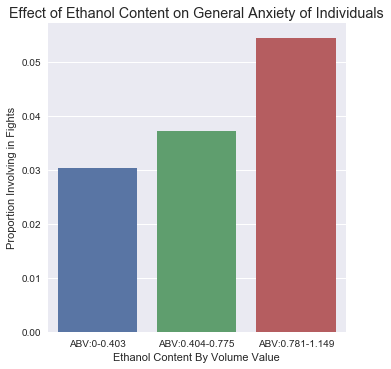

In [23]:
# bivariate bar graph C->C
sns.factorplot(x="Ethanol_Content_By_Volume", y="S9Q52", data=data, kind="bar", ci=None,size=5)
plt.title("Effect of Ethanol Content on General Anxiety of Individuals")
plt.xlabel("Ethanol Content By Volume Value")
plt.ylabel("Proportion Involving in Fights")

Here, we observe that as the ABV(Alcohol by volume) value increases, the proportion of individuals involving in fights also increases. There seems to be a positive correlation between both of them. However, before we confirm this relationship, let's check for their statistical significance.

In [24]:
data['S9Q52'] = data['S9Q52'].astype('category')

In [25]:
# contingency table of observed counts

ct1=pd.crosstab(data['S9Q52'],data['Ethanol_Content_By_Volume'])
print(ct1)

Ethanol_Content_By_Volume  ABV:0-0.403  ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                                                   
0.0                              14721            10937               87
1.0                                461              423                5


In [26]:
# column percentages

colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print(cs1)


Ethanol_Content_By_Volume  ABV:0-0.403  ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                                                   
0.0                           0.969635         0.962764         0.945652
1.0                           0.030365         0.037236         0.054348
chi-square value, p value, expected counts
(10.766260765107486, 0.0045934202377759118, 2, array([[  1.46752493e+04,   1.09808215e+04,   8.89291883e+01],
       [  5.06750695e+02,   3.79178494e+02,   3.07081174e+00]]))


We obtained a chi square statistic of 10.77 and as the p-value is less than 0.05, we conclude that we do not have enough evidence to support the null hypothesis and hence accept the alternate hypothesis that there is significant effect of amount of ethanol on general anxiety of individuals.

#### Post HOC Test

We use Bonferroni adjustments here. So now the adjusted p-value = 0.05/3 = 0.017.If the obtained p-value is less than 0.017(instead of 0.05), it means it is not statistically significant).

In [31]:
#Pairwise comparison between 1st and 2nd level of Ethanol_Content_By_Volume

recode3 = {'ABV:0-0.403': 'ABV:0-0.403', 'ABV:0.404-0.775': 'ABV:0.404-0.775'}
data['ECV1']= data['Ethanol_Content_By_Volume'].map(recode3)

# contingency table of observed counts
ct2=pd.crosstab(data['ECV1'],data['S9Q52'])
print (ct2)

S9Q52              0.0  1.0
ECV1                       
ABV:0-0.403      14721  461
ABV:0.404-0.775  10937  423


In [32]:
# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

S9Q52                 0.0       1.0
ECV1                               
ABV:0-0.403      0.573739  0.521493
ABV:0.404-0.775  0.426261  0.478507
chi-square value, p value, expected counts
(9.3159015720579799, 0.0022717356853774492, 1, array([[ 14676.35279934,    505.64720066],
       [ 10981.64720066,    378.35279934]]))


Here, as the p value is less than 0.017, we can say that there is a significant relationship between the increasing levels of alcohol consumption and general anxiety.

In [33]:
recode4 = {'ABV:0-0.403': 'ABV:0-0.403', 'ABV:0.781-1.149': 'ABV:0.781-1.149'}
data['ECV2']= data['Ethanol_Content_By_Volume'].map(recode4)

# contingency table of observed counts
ct3=pd.crosstab(data['S9Q52'], data['ECV2'])
print (ct3)

ECV2   ABV:0-0.403  ABV:0.781-1.149
S9Q52                              
0.0          14721               87
1.0            461                5


In [34]:
# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)

ECV2   ABV:0-0.403  ABV:0.781-1.149
S9Q52                              
0.0       0.969635         0.945652
1.0       0.030365         0.054348
chi-square value, p value, expected counts
(1.0598496920541276, 0.30324946920795137, 1, array([[  1.47188069e+04,   8.91931387e+01],
       [  4.63193139e+02,   2.80686133e+00]]))


In [35]:
recode5 = {'ABV:0.404-0.775': 'ABV:0.404-0.775', 'ABV:0.781-1.149': 'ABV:0.781-1.149'}
data['ECV3']= data['Ethanol_Content_By_Volume'].map(recode5)

# contingency table of observed counts
ct4=pd.crosstab(data['S9Q52'], data['ECV3'])
print (ct4)

ECV3   ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                  
0.0              10937               87
1.0                423                5


In [36]:
# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)

ECV3   ABV:0.404-0.775  ABV:0.781-1.149
S9Q52                                  
0.0           0.962764         0.945652
1.0           0.037236         0.054348
chi-square value, p value, expected counts
(0.34328631056558911, 0.55793841566830293, 1, array([[  1.09354384e+04,   8.85616486e+01],
       [  4.24561649e+02,   3.43835138e+00]]))


### ANOVA (Analysis of Variance)

It is used when we want to examine the differences in the _mean response variable for each category_ of our explanatory variable.(Eg.: Gender vs Scores) 

Then why is it known as _Analysis of Variance_?
Because it analyses means using two types of variance:
 1. Variation Among Sample Means(Between Group Variation)
 2. Variation Within Groups
    
This is calculated using F-statistic.

F-statistic = Variation Among Sample Means/Variation Within Groups

Greater the value of F-statistic, stronger is the evidence that the two groups are different.

In [37]:
#Let's try to find if people with different general anxiety levels have any variation in the amount of alcohol they consume.

samp = data[['alc_by_vol', 'MAJORDEPLIFE']].dropna()
print('Means for Ethanol Content by Major Depression Status')
m1= samp.groupby('MAJORDEPLIFE').mean()
print (m1)

print('Standard Deviations for Ethanol Content by Major Depression Status')
sd1 = samp.groupby('MAJORDEPLIFE').std()
print (sd1)


Means for Ethanol Content by Major Depression Status
              alc_by_vol
MAJORDEPLIFE            
0               0.181720
1               0.235527
Standard Deviations for Ethanol Content by Major Depression Status
              alc_by_vol
MAJORDEPLIFE            
0               0.225845
1               0.242277


In [38]:
# Using OLS function for calculating the F-statistic and associated p value

model = smf.ols(formula='alc_by_vol ~ C(MAJORDEPLIFE)', data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             alc_by_vol   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     354.3
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           1.02e-78
Time:                        18:30:13   Log-Likelihood:                 2390.0
No. Observations:               43093   AIC:                            -4776.
Df Residuals:                   43091   BIC:                            -4759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1817      0.001    149.046      0.000       0.179       0.184
C(MAJORDEPLIFE)[T.1]     0.0538      0.003     18.823      0.000       0.048       0.059
==============================================================================
Omnibus:                     9367.554   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6281.500
Skew:                           0.823   Prob(JB):                         0.00
Kurtosis:                       2.112   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, we observe that the F-statistic is 354.3 and the p value is less than our significance level(0.05). So we can reject the null hypothesis and state that the amount of alcohol consumed is related to the depression levels of a person.

### Pearson Correlation 

Pearson Correlation is used to find the strength of linear relationship between two variables. Its coefficient value ranges from -1 to 1, -1 indicating highly negatively correlated(one increases,other decreases) and 1 indicating highly positively correlated(one increases,other also increases). 0 indicates "no linear relationship". 

The associated p value indicates the significance of the correlation coefficient value.

Now let's see if there is any relationship between age and the amount of ethanol consumed.

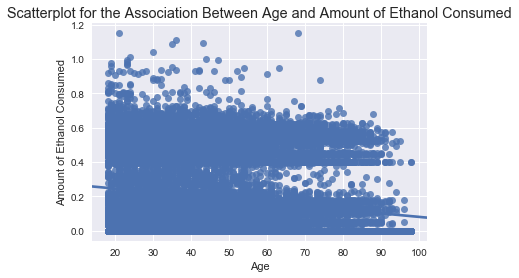

In [50]:
#Scatterplot for the Association Between Age and Amount of Ethanol Consumed

sns.regplot(x="AGE", y="alc_by_vol", fit_reg=True, data=data)
plt.xlabel('Age')
plt.ylabel('Amount of Ethanol Consumed')
plt.title('Scatterplot for the Association Between Age and Amount of Ethanol Consumed')

There is hardly any association noticeable from the graph. But let's check for its significance before concluding it.

In [51]:
#Calculating Pearson Correlation Coefficient for variables age and amount of ethanol by volume(alc_by_vol)

print ('Association between Age and Ethanol Content Consumed')
print (scipy.stats.pearsonr(data['AGE'], data['alc_by_vol']))

Association between Age and Ethanol Content Consumed
(-0.16265872269495299, 2.9543760108338874e-253)


We observe that they are slightly negatively correlated which means that as the age of person increases, the amount of alcohol he consumes decreases.